# Evaluation of Shooting Cases across United States of America from Jan2015 to June2020 

Within the Country, there ha been heated argument that only a particular Race has always been the Victim of the Shooting,
which has lead to Chaos across the country;
This report is meant to reveal if such claim is true.

# Data Information

The Dataset Contains the following information about each victim: Identity number, Name, Manner of death, Either armed or not, Age, Gender, Race, City, State, Signs of mental illness, Threat level dispalyed agaist the Police,Flee, Eithe the Police used a body camera or not, Arms category used by the Victim, and Year of occurence.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv('C:/Users/OlADAYO/Documents/raw_data/Shootings.csv')

In [6]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.000000,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.000000,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.000000,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.000000,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.000000,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.000000,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.000000,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.000000,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.000000,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.000000,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects


In [9]:
#Checking for the number of Null Values in each column
df.isnull().sum(axis = 0)

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

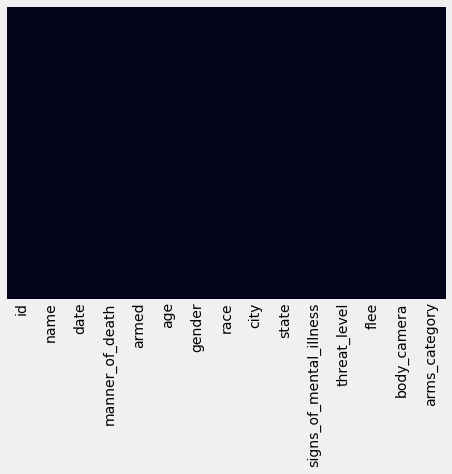

In [10]:
#Cross-Checking for missing values using Seaborn's Heatmap
plt.figure(figsize = (7,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False);

As confirmed that the Data contains no Null Values, we can forge ahead with the evaluation 

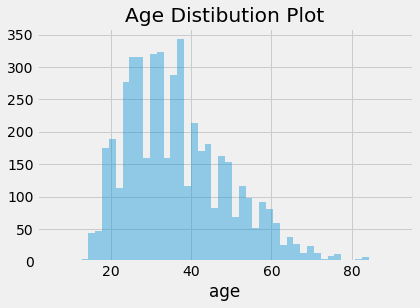

In [16]:
#Checking for the age distribution of the victims distributed
sns.distplot(df['age'], bins = 50, kde = False)
plt.title('Age Distibution Plot');

From the Distriburion Plot ABOVE, it is observed that bulk of the Victims were aged between the age of 20 and 50.

In [17]:
#Cross Tabulation between Race and Gender of the Victims
pd.crosstab(df['race'], df['gender'])

gender,F,M
race,,
Asian,4,89
Black,47,1251
Hispanic,26,876
Native,5,73
Other,4,44
White,136,2340


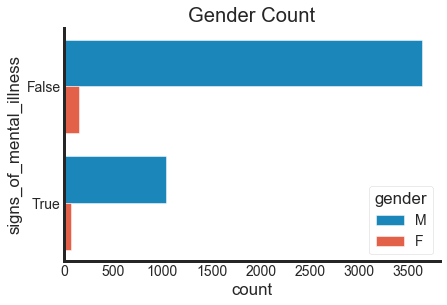

In [18]:
sns.set_style('ticks')
sns.countplot(y='signs_of_mental_illness', hue = 'gender', data =df)
sns.despine()
plt.title('Gender Count');

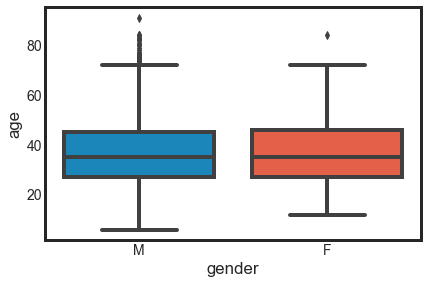

In [29]:
#Box Plot
sns.boxplot(x='gender', y='age', data= df);

The averege age of both genger of Victims falls on 35 as seen ABOVE

In [11]:
#Cross tabulation of Races according to Sing of Illness
pd.crosstab(df['race'], df['signs_of_mental_illness'])

signs_of_mental_illness,False,True
race,,
Asian,69,24
Black,1114,184
Hispanic,745,157
Native,64,14
Other,37,11
White,1763,713


The death rate BELOW shows that we have most victims among the White race followed by the Black 

In [7]:
df['race'].value_counts().to_frame()

,race
White,2476
Black,1298
Hispanic,902
Asian,93
Native,78
Other,48


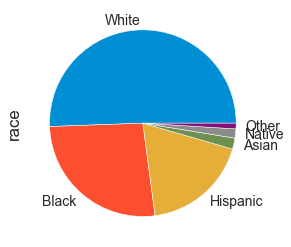

In [30]:
#Representating the Death rate with a Pie Chart
df['race'].value_counts().plot(kind = 'pie')

In [9]:
#Value count of Victims according to arms used
df['armed'].value_counts().head(10).to_frame()

,armed
gun,2755
knife,708
unknown,418
unarmed,348
toy weapon,171
vehicle,120
machete,39
Taser,24
sword,22
ax,21


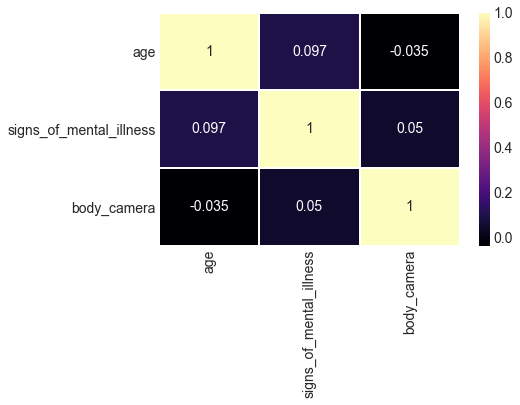

In [19]:
#The Correlation among Numerical/Boolean Values
sns.heatmap((df.drop(['id'], axis=1).corr()),cmap = 'magma',
            linewidths=1, linecolor='white', annot = True);

The ABOVE heatmap indicates a strong positive correlation between age and a victim with Sign of illness

In [10]:
#How the Victims were killed
df['manner_of_death'].value_counts().to_frame()

,manner_of_death
shot,4647
shot and Tasered,248


In [ ]:
#Visualising the 'manner of death' Column on a single Histogram

In [124]:
filt1 = df['manner_of_death'] == 'shot'

In [125]:
filt2 = df['manner_of_death'] == 'shot and Tasered'

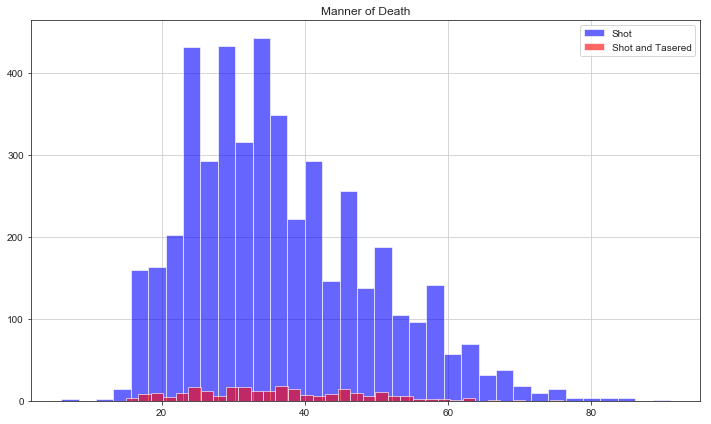

In [128]:
plt.figure(figsize=(12,7))
df.loc[filt1, 'age'].hist(bins=35, color='blue', alpha= 0.6, label ='Shot' )
df.loc[filt2, 'age'].hist(bins=35, color='red', alpha= 0.6, label ='Shot and Tasered')
plt.title('Manner of Death')
plt.legend();


In [11]:
df['flee'].value_counts().to_frame()

,flee
Not fleeing,3073
Car,820
Foot,642
Other,360


As seen from the table ABOVE, majority of the Vioctims did not flee from the Police before being shot 

In [12]:
#Number of incidents according to State
df['state'].value_counts().head(10).to_frame()

,state
CA,701
TX,426
FL,324
AZ,222
CO,168
GA,161
OK,151
NC,148
OH,146
WA,126



# The DateTime 

In [13]:
#converting the 'timeStamp' column to datetime
df['date']=pd.to_datetime(df['date'])

In [14]:
df['Year'] = df['date'].dt.year

In [15]:
df['Month'] = df['date'].dt.month

In [16]:
df['Day'] = df['date'].dt.day

In [17]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,Year,Month,Day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1,2
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1,2
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1,3
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,4
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,4


In [18]:
#Setting the Date column as the Index Column
df.set_index(['date'], inplace = True)

In [19]:
df.head()

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,Year,Month,Day
date,,,,,,,,,,,,,,,,,
2015-01-02,3,Tim Elliot,shot,gun,53.000000,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1,2
2015-01-02,4,Lewis Lee Lembke,shot,gun,47.000000,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1,2
2015-01-03,5,John Paul Quintero,shot and Tasered,unarmed,23.000000,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1,3
2015-01-04,8,Matthew Hoffman,shot,toy weapon,32.000000,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,4
2015-01-04,9,Michael Rodriguez,shot,nail gun,39.000000,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,4
2015-01-04,11,Kenneth Joe Brown,shot,gun,18.000000,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns,2015,1,4
2015-01-05,13,Kenneth Arnold Buck,shot,gun,22.000000,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns,2015,1,5
2015-01-06,15,Brock Nichols,shot,gun,35.000000,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns,2015,1,6
2015-01-06,16,Autumn Steele,shot,unarmed,34.000000,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed,2015,1,6


In [20]:
#Arranging the Years in Descending order according to Shooting Incidents
df['Year'].value_counts().to_frame()

,Year
2015,965
2017,906
2016,904
2018,888
2019,858
2020,374


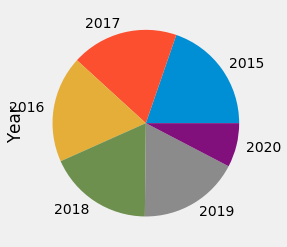

In [21]:
df['Year'].value_counts().plot(kind = 'pie');

In [23]:
df['Month'].value_counts().to_frame()

,Month
1,505
3,503
2,462
4,430
5,418
7,413
6,399
8,371
10,367
11,354


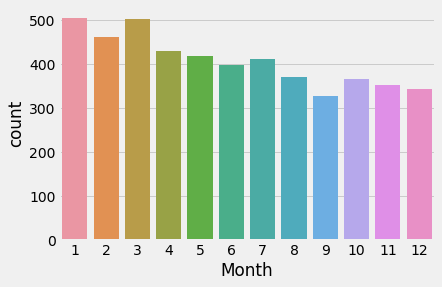

In [22]:
#Arranging the Months in Descending order according to Shooting Incidents
sns.countplot(x = 'Month', data = df );

# The Verdicts

It was discovered that most of the Victims were between the age of 20 and 50.

It can also be seen that more than half of the Victims were of the White Race as against the public 
believe that Blacks are the most victim of shooting within the Country

The average age of the Victims falls around 35

Over 70% of the Victims were Male

Majority of the Victims were shot at without any sign of illness, at the same time, not fleeting from the Police Officer

Less Than 3% of the Victims were Shot and Tarserd at the same time

Most of the Victims were armed with Guns while others were armed with other thingd like knife etc

Mejority of the Victims that were with sign of illness were the aged ones above 60 years

2015 id the year with the Highest death rate, followed by 2017, 2016, 2018 and 2020 respectively

January has the highest death rate, followed by March, February, April, May, July, June, Aughust, October, November, Decemeber and September respectively.